In [1]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data from pickle file
data_dict = pickle.load(open('./data.pickle', 'rb'))

In [3]:
# Assume data is a list of sequences, like text sequences
data_sequences = data_dict['data']

In [4]:
# Example: Padding sequences to a maximum length
max_sequence_length = 100  # Adjust as needed
data_padded = []
for sequence in data_sequences:
    if len(sequence) < max_sequence_length:
        padded_sequence = sequence + [0] * (max_sequence_length - len(sequence))  # Padding with zeros
    else:
        padded_sequence = sequence[:max_sequence_length]  # Trim to max length if longer
    data_padded.append(padded_sequence)

In [5]:
# Convert lists to numpy arrays
data = np.asarray(data_padded)
labels = np.asarray(data_dict['labels'])


In [6]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)


In [7]:
# Initialize and train RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [8]:

# Predict on test set using Random Forest
y_pred_rf = rf_model.predict(x_test)

In [9]:
# Calculate accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

Random Forest Accuracy: 99.60%


In [10]:
# Initialize and train SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

In [11]:

# Predict on test set using SVM
y_pred_svm = svm_model.predict(x_test)

In [12]:
# Calculate accuracy for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

SVM Accuracy: 99.20%


In [13]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

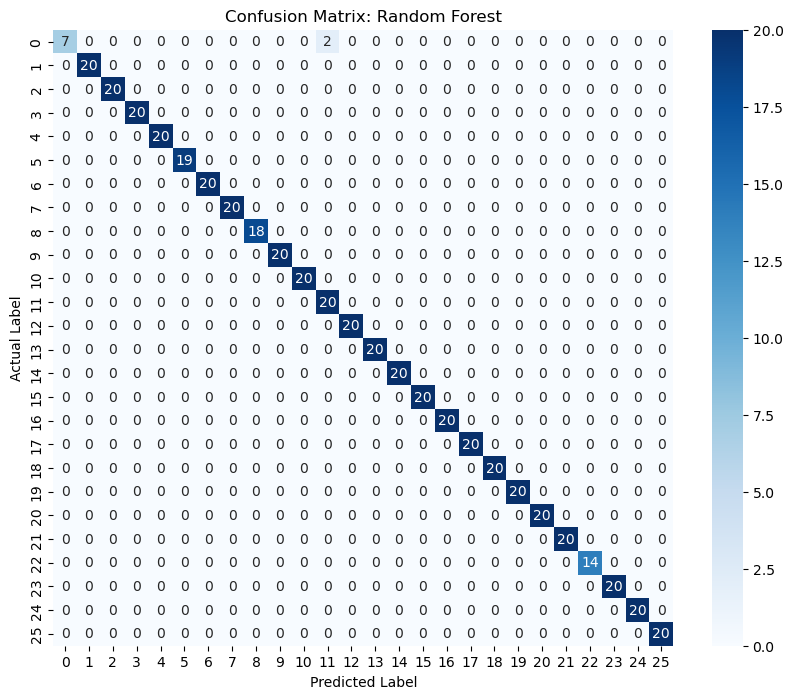

In [14]:
# Plot confusion matrix for both models
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')


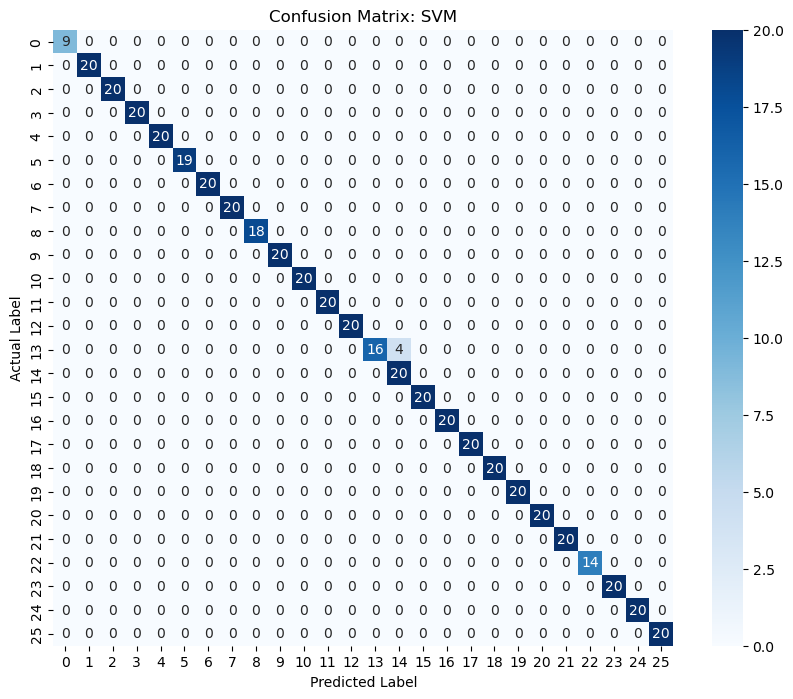

In [15]:
plot_confusion_matrix(y_test, y_pred_svm, 'SVM')

In [16]:
# Classification report for both models
report_rf = classification_report(y_test, y_pred_rf)
report_svm = classification_report(y_test, y_pred_svm)

In [17]:
print("Random Forest Classification Report:\n", report_rf)


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        18
          17       1.00      1.00      1.00        20
          18       1.00      1.00      1.00        20
          19       0.91      1.00      0.95        20
           2       1.00      1.00      1.00        20
          20       1.00      1.00      1.00        20
          21       1.00      1.00      1.00        20
          22       1.00      1.00      1.00        20
          23       1.00      1.00      1.00

In [18]:
print("SVM Classification Report:\n", report_svm)

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        18
          17       1.00      1.00      1.00        20
          18       1.00      1.00      1.00        20
          19       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
          20       1.00      0.80      0.89        20
          21       0.83      1.00      0.91        20
          22       1.00      1.00      1.00        20
          23       1.00      1.00      1.00        20

In [19]:
# Comparison Table
comparison_table = {
    'Model': ['Random Forest', 'SVM'],
    'Accuracy': [accuracy_rf * 100, accuracy_svm * 100]
}

# Display comparison table
for model, acc in zip(comparison_table['Model'], comparison_table['Accuracy']):
    print(f"{model} Accuracy: {acc:.2f}%")

Random Forest Accuracy: 99.60%
SVM Accuracy: 99.20%


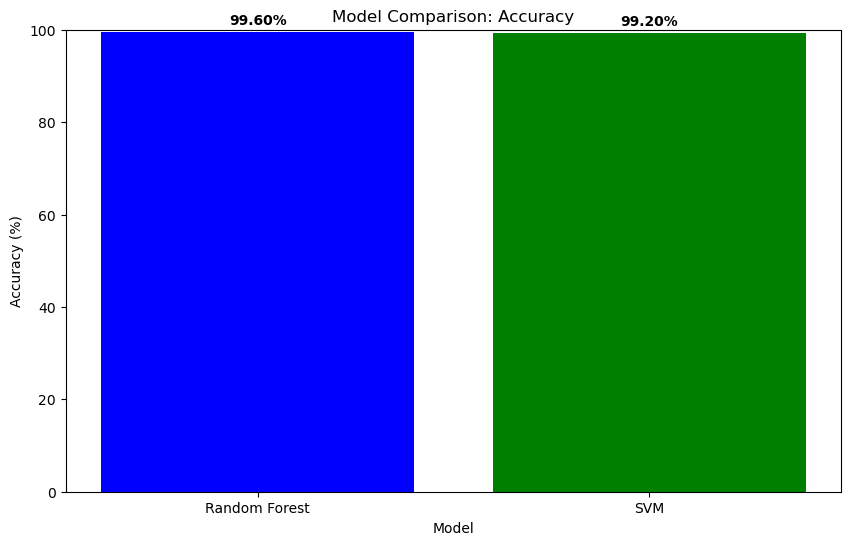

In [20]:
import matplotlib.pyplot as plt

# Comparison data
models = ['Random Forest', 'SVM']
accuracies = [accuracy_rf * 100, accuracy_svm * 100]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison: Accuracy')
plt.ylim(0, 100)  # Setting y-axis range from 0 to 100%
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom', fontweight='bold')
plt.show()


In [ ]:
# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# Save the model
joblib.dump(model, 'model.joblib')